<a href="https://colab.research.google.com/github/salfaris/notebooks/blob/main/2021_09_07_preparing_image_dataset_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Image Dataset for Neural Networks in PyTorch

This notebook is a simplified version of my blog post which you can find [here](https://salfaris.me/blog/2021-09-07-preparing-image-dataset-for-neural-networks-in-pytorch.html).

### PyTorch and Torchvision

Start by importing `torch` and `torchvision`.

In [10]:
import torch
from torchvision import datasets, transforms

torch.manual_seed(44)

### 👜 Fashion MNIST dataset and composing transformations

We will apply two simple transformations to our image:

1. Converting the images to a PyTorch `tensor` – by using `transforms.ToTensor()`.
2. Normalize the channel of the resulting tensor – by using `transforms.Normalize()`.

We can then compose these transformations using `transforms.Compose()` as below.

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5)),
])

### 💾 From dataset to Dataloader

The next step is to finally fetch the dataset, passing our transform above as an argument. We then feed into PyTorch's `DataLoader` object to get features like batching, shuffling and loading data in parallel.

In [12]:
trainset = datasets.FashionMNIST(root='./data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=0)

testset = datasets.FashionMNIST(root='./data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=0)

### 🕵️ Inspecting the dataset in DataLoader form

Once we have the dataset in DataLoader form, we can start inspecting our dataset.

In [13]:
print("Train shape:", trainloader.dataset.data.shape)
print("Test shape:", testloader.dataset.data.shape)

Train shape: torch.Size([60000, 28, 28])
Test shape: torch.Size([10000, 28, 28])


In [14]:
print("Train batch size:", trainloader.batch_size)
print("Test batch size:", testloader.batch_size)

Train batch size: 64
Test batch size: 64


In [15]:
print("Sampler:", trainloader.sampler)
print("Collate function:", trainloader.collate_fn)

Sampler: <torch.utils.data.sampler.RandomSampler object at 0x7f157ca69750>
Collate function: <function default_collate at 0x7f157ee848c0>


We can also plot an example image. Let's plot the first image from the first batch in `trainloader`.

In [16]:
import matplotlib.pyplot as plt

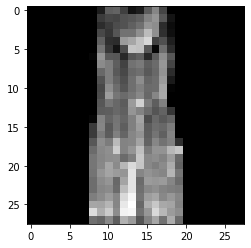

In [17]:
images, labels = next(iter(trainloader))  # Gets a batch of 64 images in the training set
first_image = images[0]  # Get the first image out of the 64 images.

plt.imshow(first_image.numpy().squeeze(), cmap='Greys_r')
plt.show()